In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from pytest import approx

In [2]:
ref_file = 'data/GGHO_2023.05.30_THZ1_0001.txt'
sample_file = 'data/GGHO_2023.05.30_THZ1_0032.txt'

In [3]:
ref = np.loadtxt(fname=ref_file, delimiter=' ')
sample = np.loadtxt(fname=sample_file, delimiter=' ')

In [4]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref)
xf = fftfreq(N, T)

Text(0.5, 1.0, 'original data, columns 2 - 1, against column 0')

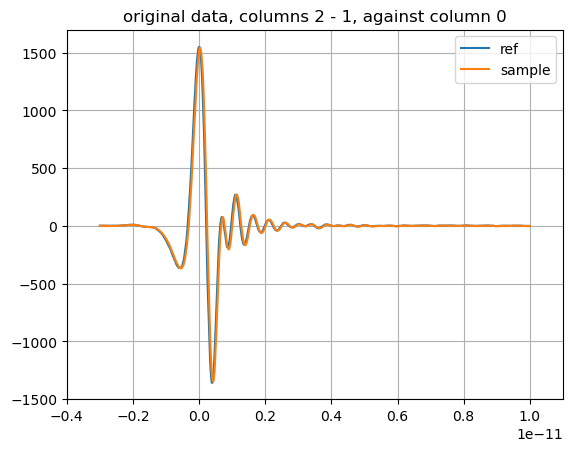

In [5]:
ref_2min1 = ref[:, 2] - ref[:, 1]
sample_2min1 = sample[:, 2] - sample[:, 1]
plt.plot(ref[:, 0], ref_2min1, label="ref")
plt.plot(sample[:, 0], sample_2min1, label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title('original data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'inverse of fft of data, columns 2 - 1, against column 0')

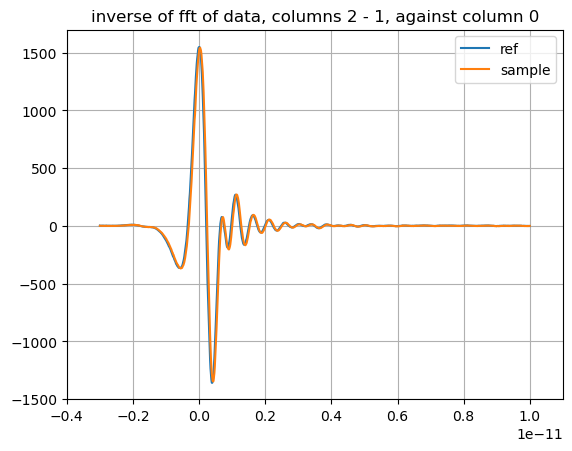

In [6]:
plt.plot(ref[:, 0], np.real(ifft(fft(ref_2min1))), label="ref")
plt.plot(sample[:, 0], np.real(ifft(fft(sample_2min1))), label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title('inverse of fft of data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'fft of data')

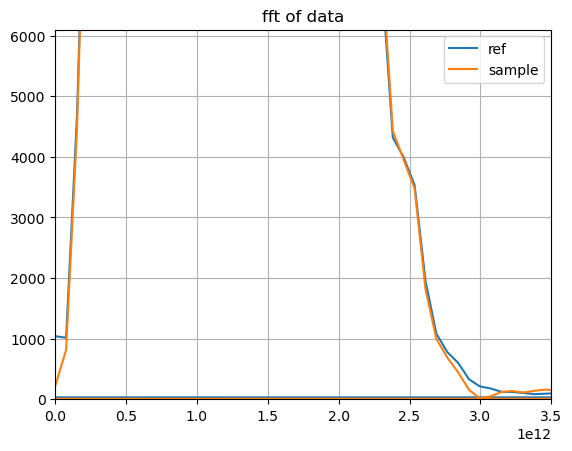

In [7]:
plt.plot(xf, np.abs(fft(ref_2min1)), label="ref")
plt.plot(xf, np.abs(fft(sample_2min1)), label="sample")
plt.legend()
plt.grid()
plt.xlim((0, .35e13))
plt.ylim((0, 6100))
plt.title('fft of data')

In [8]:
signal_duration = 0.8e-11
freq = 1./signal_duration
"{:e}".format(freq/2)

'6.250000e+10'

In [9]:
time_step = T
freq = 1./T
"{:e}".format(freq/2)

'3.842312e+13'

Text(0.5, 1.0, 'fft of ref / fft of sample')

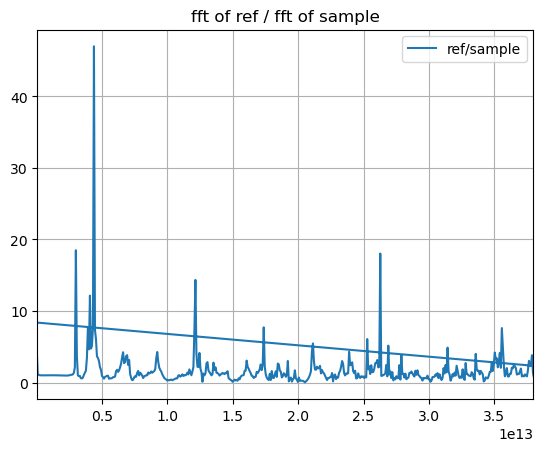

In [10]:
ref_fft = fft(ref_2min1)
sample_fft = fft(sample_2min1)
plt.plot(xf, np.abs(ref_fft/sample_fft), label="ref/sample")
plt.legend()
plt.grid()
plt.xlim((0.06e12, 3.8e13))
# plt.xlim((0.2e12, 2.1e12))
# plt.ylim((0, 61000))
plt.title('fft of ref / fft of sample')

1.536925e+11 2.305387e+11 -2.305387e+11 -1.536925e+11
2.074848e+12 2.151694e+12
-2.151694e+12 -2.074848e+12


Text(0.5, 1.0, 'fft of ref / fft of sample')

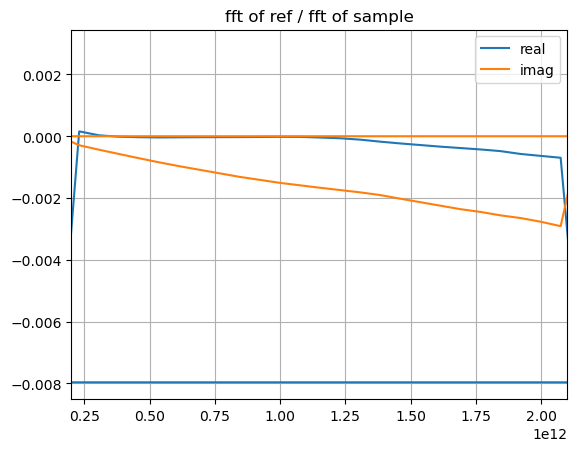

In [11]:
print("{:e}".format(xf[2]), "{:e}".format(xf[3]), "{:e}".format(xf[-3]), "{:e}".format(xf[-2]))
print("{:e}".format(xf[27]), "{:e}".format(xf[28]))
print("{:e}".format(xf[-28]), "{:e}".format(xf[-27]))
for i in range(3):
    ref_fft[i] = 0.+0.j
for i in range(-2, 0, 1):
    ref_fft[i] = 0.+0.j
for i in range(28, 500, 1):
    ref_fft[i] = 0.+0.j
for i in range(-500, -27, 1):
    ref_fft[i] = 0.+0.j

plt.plot(xf, 0.007965 * np.real(ref_fft/sample_fft - 1.), label="real")
plt.plot(xf, -0.007965 * np.imag(ref_fft/sample_fft - 1.), label="imag")
plt.legend()
plt.grid()
plt.xlim((0.06e12, 3.8e13))
plt.xlim((0.2e12, 2.1e12))
# plt.ylim((-.002, .0005))
plt.title('fft of ref / fft of sample')

Text(0.5, 1.0, 'inverse of truncated fft of data, columns 2 - 1, against column 0')

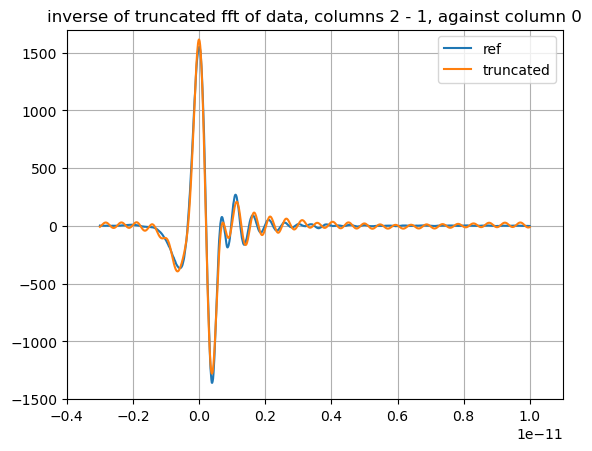

In [12]:
plt.plot(ref[:, 0], ref_2min1, label="ref")
plt.plot(ref[:, 0], np.real(ifft(ref_fft)), label="truncated")
# plt.plot(sample[:, 0], np.real(ifft(fft(sample_2min1))), label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title('inverse of truncated fft of ref data, columns 2 - 1, against column 0')